In [6]:
from glob import glob
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# plt.style.use('classic')

In [29]:
import os
import cv2
from PIL import Image
import numpy as np

In [34]:
!ls

Classifier.ipynb  Data_understanding.ipynb  unique  Untitled.ipynb


In [48]:
er = sorted(glob("unique/*ER*"))
nr = sorted(glob("unique/*NR*"))

In [49]:
er

['unique/0_ER_1.png',
 'unique/1_ER_3.png',
 'unique/2_ER_6.png',
 'unique/3_ER_10.png',
 'unique/4_ER_20.png',
 'unique/5_ER_30.png']

In [50]:
nr

['unique/0_NR_1.png',
 'unique/1_NR_3.png',
 'unique/2_NR_6.png',
 'unique/3_NR_10.png',
 'unique/4_NR_20.png',
 'unique/5_NR_30.png']

<ipython-input-51-15c2934b6811>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(141).title.set_text(t1)
<ipython-input-51-15c2934b6811>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(142).title.set_text(t3)
<ipython-input-51-15c2934b6811>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new inst

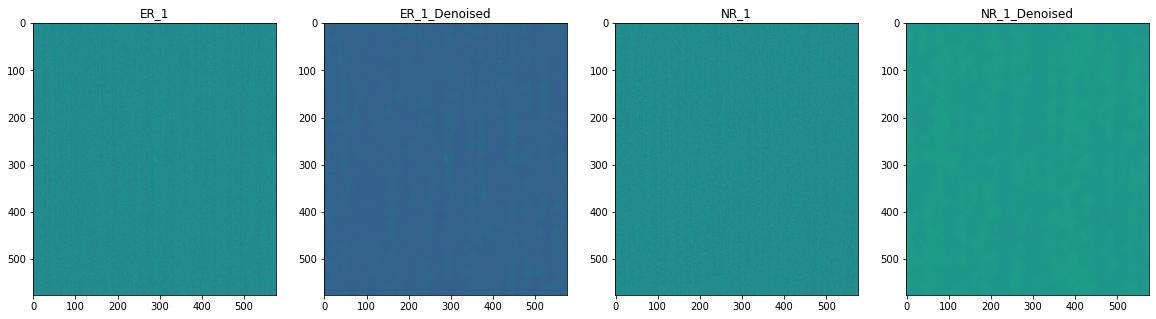

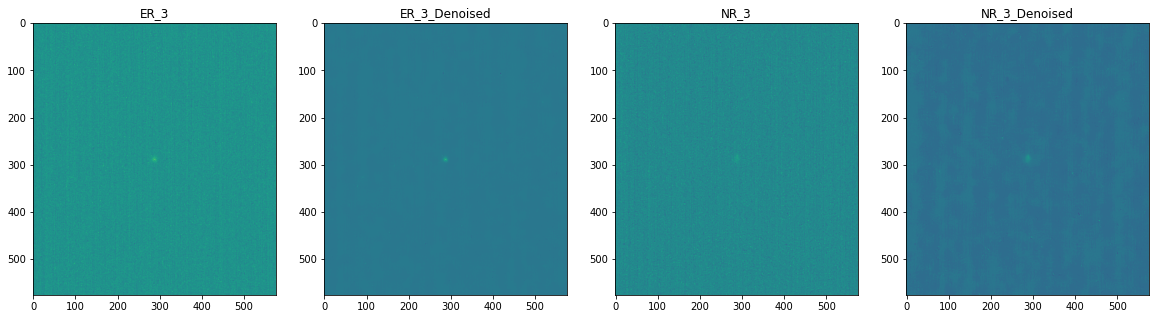

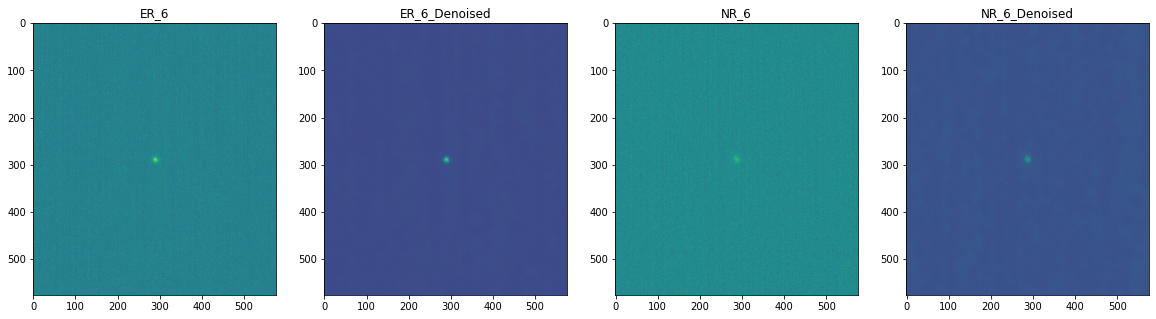

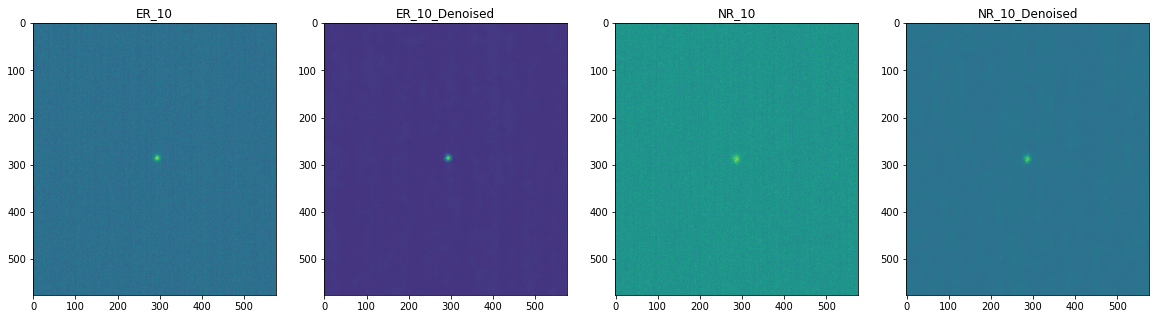

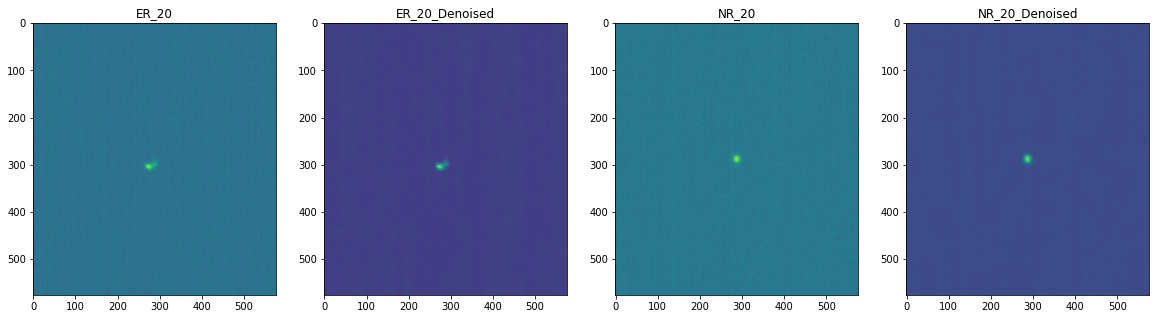

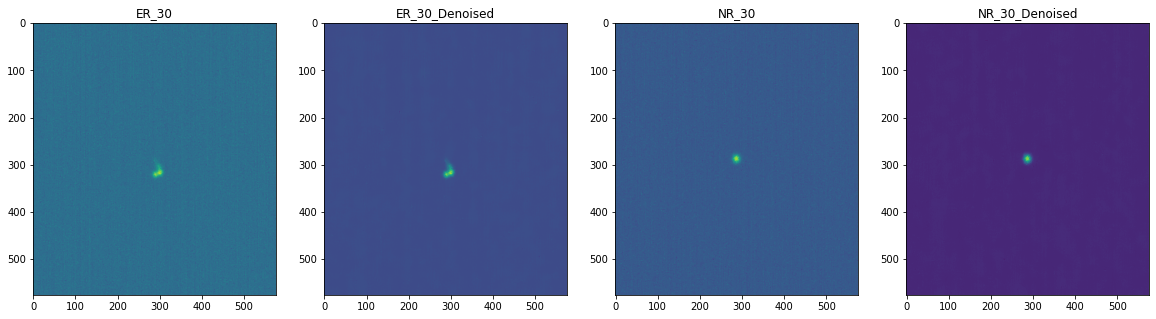

In [51]:
for arg in range(len(er)):
    fig = plt.figure()
    fig.set_size_inches(20,5)
    img = cv2.imread(er[arg], cv2.IMREAD_UNCHANGED)
    t1 = er[arg].replace("unique\\", "")
    t1 = t1.replace(".png", "")
    t1 = t1.split("_")[1]+"_"+t1.split("_")[2]
    img2 = cv2.imread(nr[arg], cv2.IMREAD_UNCHANGED)
    t2 = nr[arg].replace("unique\\", "")
    t2 = t2.replace(".png", "")
    t2 = t2.split("_")[1]+"_"+t2.split("_")[2]
    dst = cv2.fastNlMeansDenoising(img)
    t3 = t1+"_Denoised"
    dst2 = cv2.fastNlMeansDenoising(img2)
    t4 = t2+"_Denoised"
#     print(er[arg], nr[arg])
    plt.subplot(141),plt.imshow(img, aspect='auto')
    plt.subplot(141).title.set_text(t1)
    plt.subplot(142),plt.imshow(dst, aspect='auto')
    plt.subplot(142).title.set_text(t3)
    plt.subplot(143),plt.imshow(img2, aspect='auto')
    plt.subplot(143).title.set_text(t2)
    plt.subplot(144),plt.imshow(dst2, aspect='auto')
    plt.subplot(144).title.set_text(t4)
#     plt.fig_size
    plt.show()

In [57]:
ER6 = cv2.imread(er[2], cv2.IMREAD_UNCHANGED)
NR6 = cv2.imread(nr[2], cv2.IMREAD_UNCHANGED)
ER6, NR6 

(array([[100, 104, 100, ..., 102, 102, 105],
        [ 99, 101, 103, ...,  97,  98, 102],
        [ 97, 104, 103, ..., 104,  99, 102],
        ...,
        [ 99, 101, 100, ..., 101,  98, 103],
        [ 99, 109, 101, ..., 103,  92,  98],
        [102, 106,  98, ..., 100,  99, 102]], dtype=uint8),
 array([[104,  97,  99, ...,  97, 103, 106],
        [ 96, 104,  98, ...,  97,  98, 102],
        [ 97, 101,  99, ..., 109,  99, 101],
        ...,
        [104, 103, 100, ..., 100, 101, 101],
        [ 96,  97, 102, ..., 104, 104,  98],
        [100,  99, 105, ...,  94, 103, 103]], dtype=uint8))

In [58]:
ER6_den = cv2.fastNlMeansDenoising(ER6)
NR6_den = cv2.fastNlMeansDenoising(NR6)

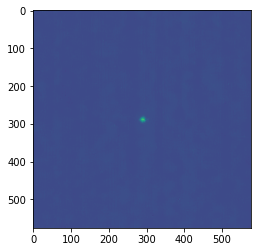

In [72]:
plt.imshow(ER6_den)

In [110]:
# np.sum(np.logical_or(ER6_den<98, ER6_den>102)) 
np.sum(ER6_den>103) 

396

In [112]:
new_size = 64

In [113]:
ER6_crop = ER6_den[int(ER6_den.shape[0]/2 - new_size/2):int(ER6_den.shape[0]/2 + new_size/2),
                  int(ER6_den.shape[1]/2 - new_size/2):int(ER6_den.shape[1]/2 + new_size/2)]

In [114]:
#np.sum(np.logical_or(ER6_crop<98, ER6_crop>102)) 
np.sum(ER6_crop>103)

276

In [115]:
ER6_crop[60]

array([100, 101, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 101, 101, 100, 101, 101, 101, 100, 101, 101, 101,
       101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
       101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 102, 100,
       102, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101],
      dtype=uint8)

In [143]:
def crop_denoise(path, new_size=128, mode=cv2.IMREAD_UNCHANGED, pix_sep=105, draw=False):
    img = cv2.imread(path, mode)
    img_den = cv2.fastNlMeansDenoising(img)
    img_crop = img_den[int(img_den.shape[0]/2 - new_size/2):int(img_den.shape[0]/2 + new_size/2),
                  int(img_den.shape[1]/2 - new_size/2):int(img_den.shape[1]/2 + new_size/2)]
    if draw:
        fig = plt.figure()
        fig.set_size_inches(21,7)
        plt.subplot(131),plt.imshow(img, aspect='auto')
        plt.subplot(131).title.set_text("Default")
        plt.subplot(132),plt.imshow(img_den, aspect='auto')
        plt.subplot(132).title.set_text("Denoised")
        plt.subplot(133),plt.imshow(img_crop, aspect='auto')
        plt.subplot(133).title.set_text("Cropped")
        plt.suptitle(f"Big pixels: {np.sum(img_crop>pix_sep)}/{np.sum(img_den>pix_sep)}")
        plt.show()
    return img_crop

<ipython-input-143-47b73ff1550c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131).title.set_text("Default")
<ipython-input-143-47b73ff1550c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132).title.set_text("Denoised")
<ipython-input-143-47b73ff1550c>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future v

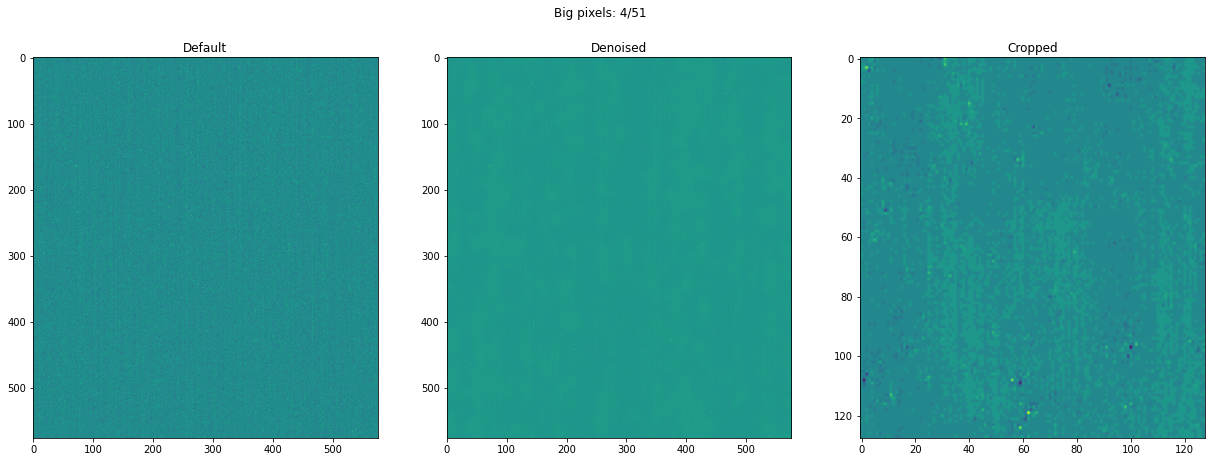

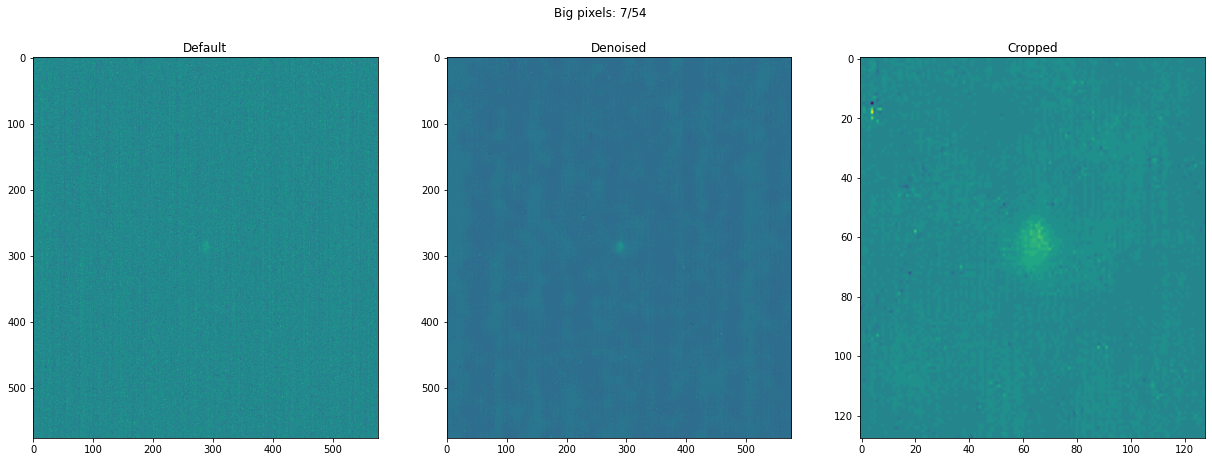

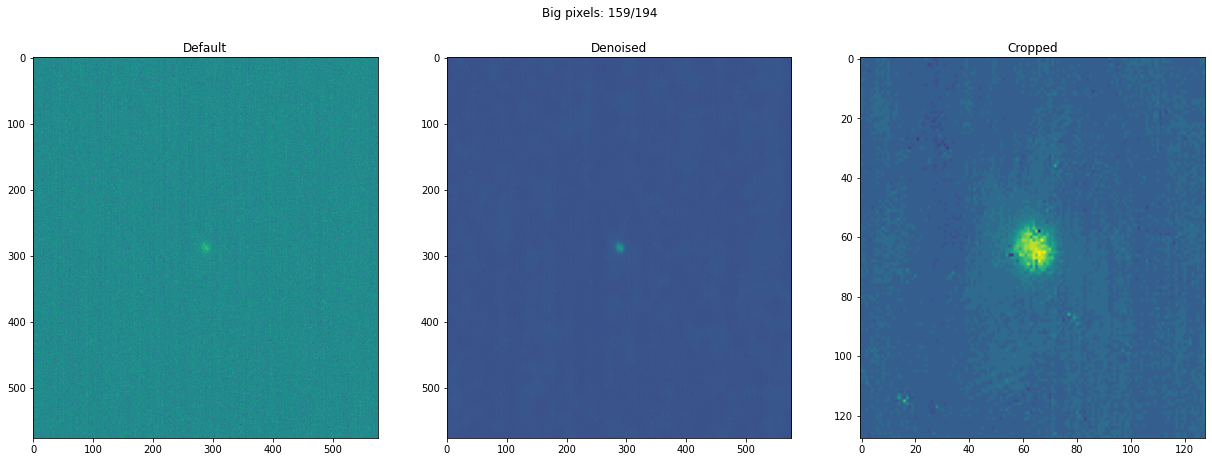

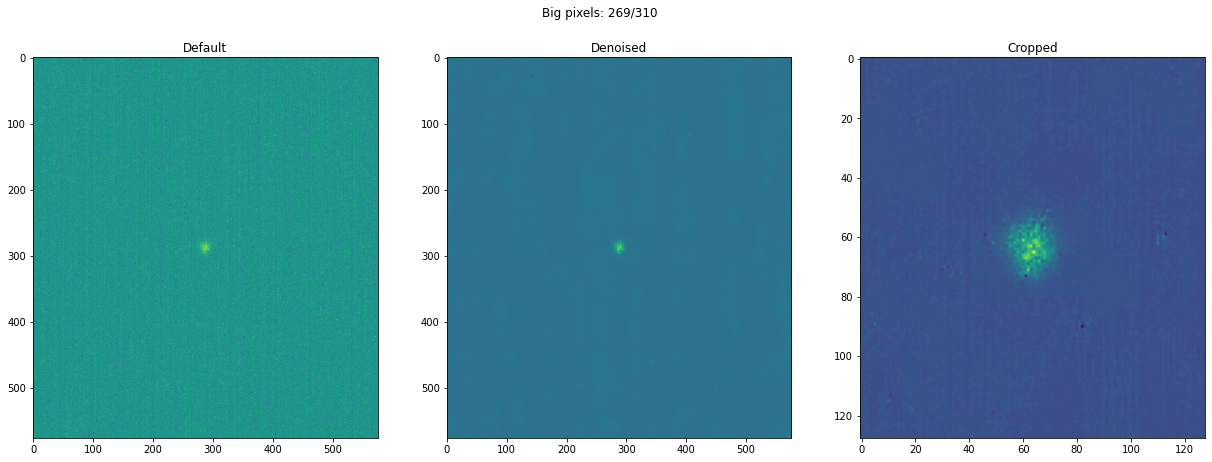

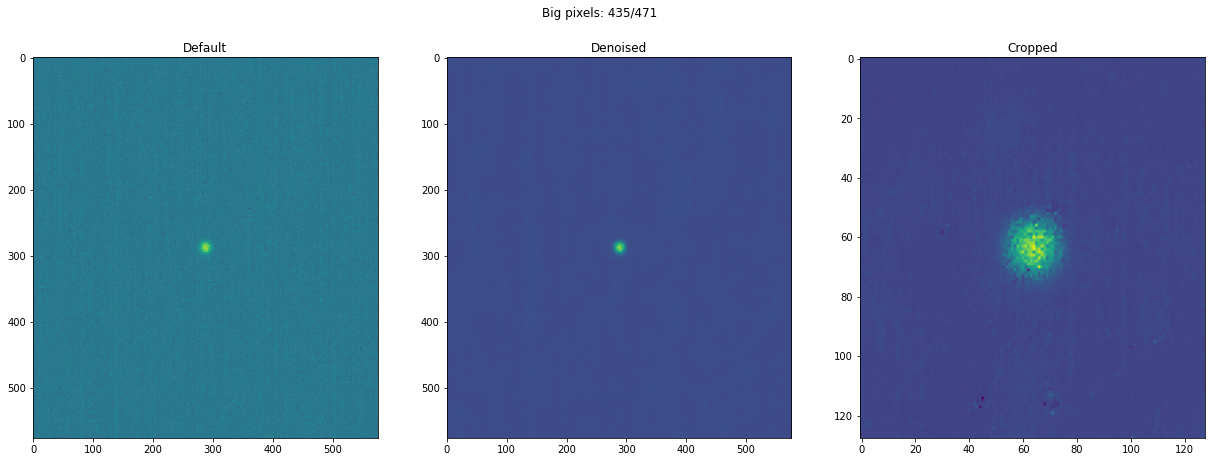

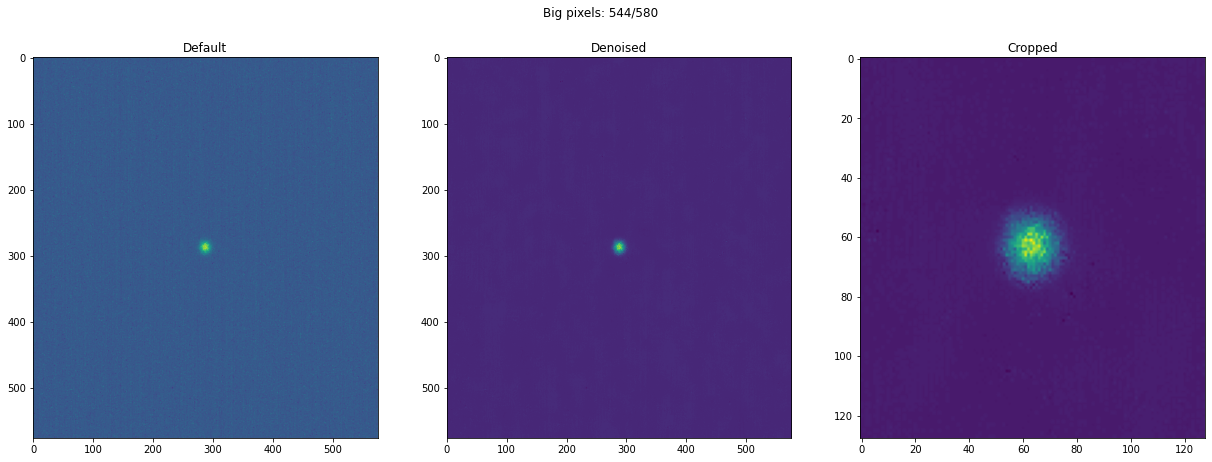

In [148]:
for nr_im in nr:
    crop_denoise(nr_im, draw=True)

<ipython-input-143-47b73ff1550c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(131).title.set_text("Default")
<ipython-input-143-47b73ff1550c>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(132).title.set_text("Denoised")
<ipython-input-143-47b73ff1550c>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future v

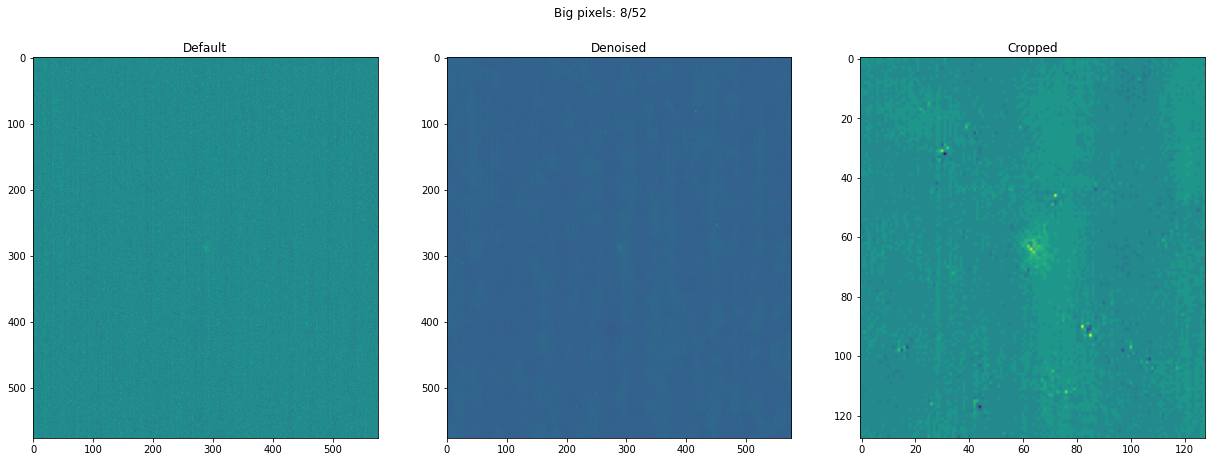

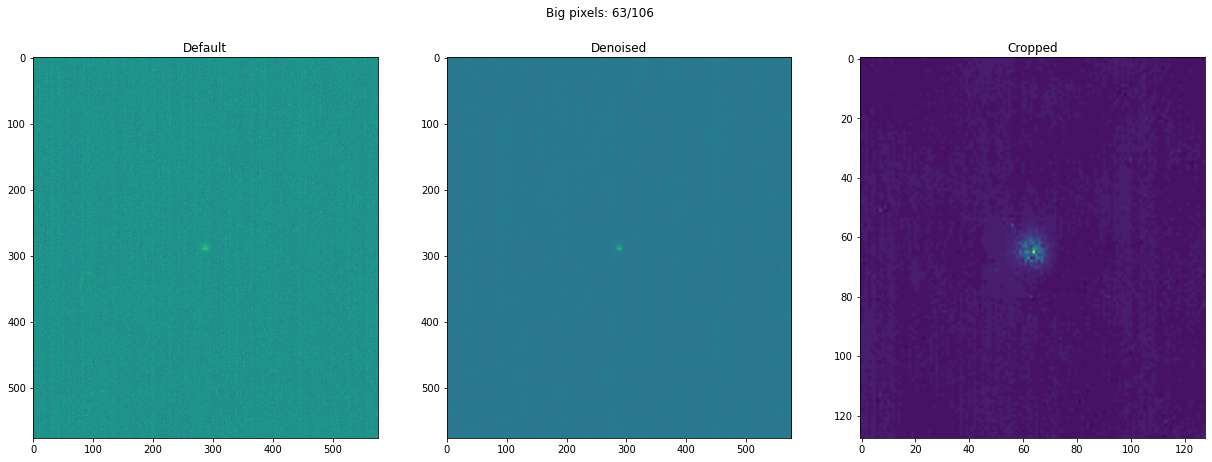

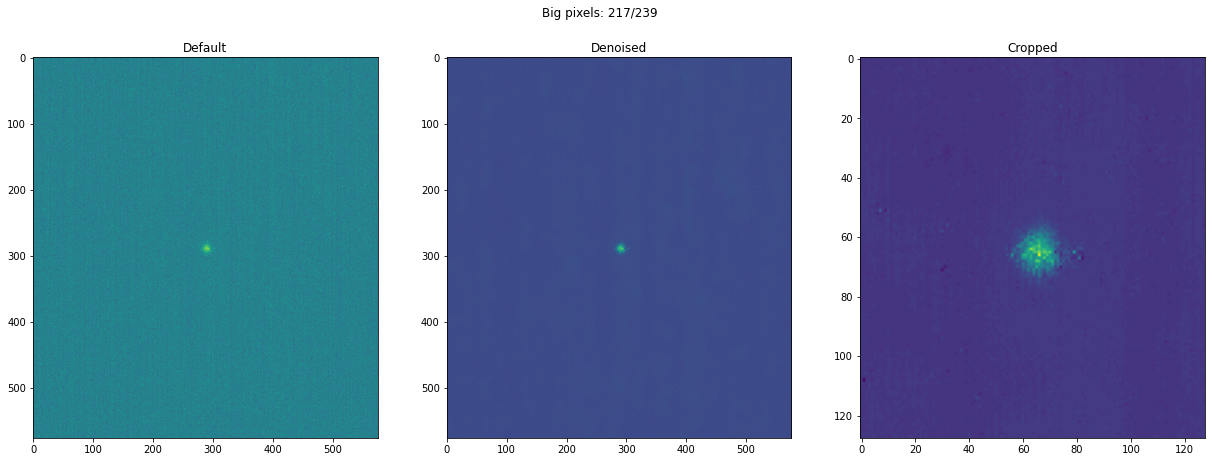

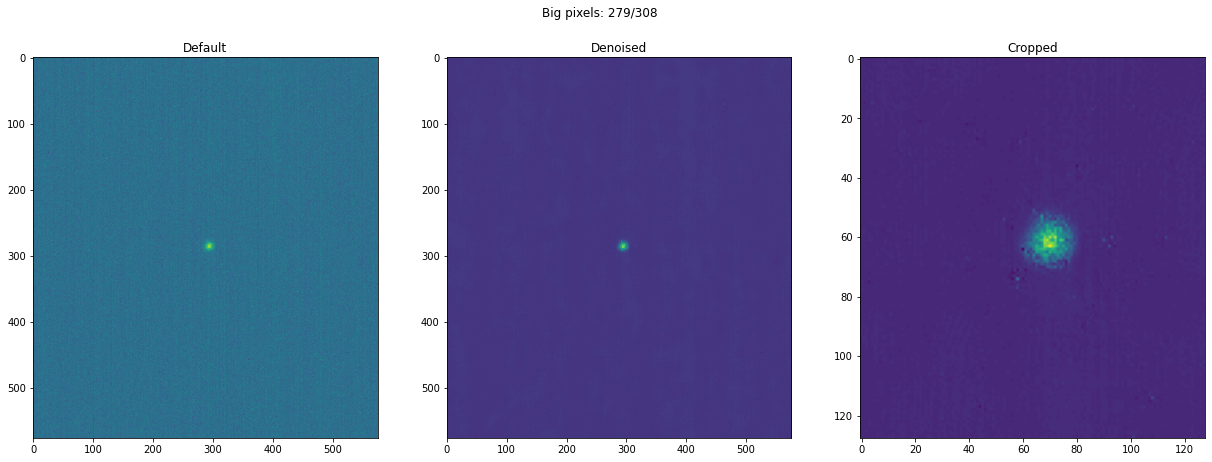

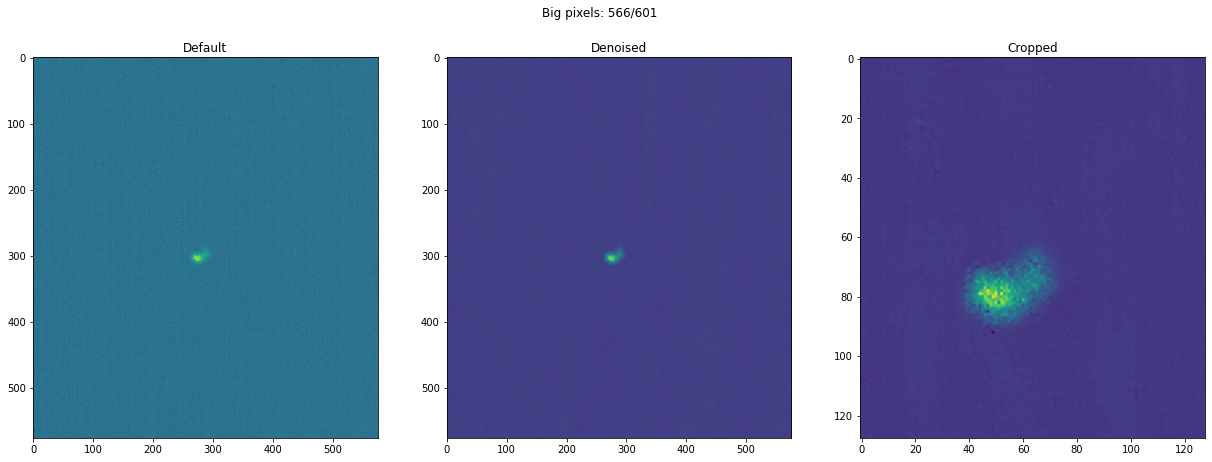

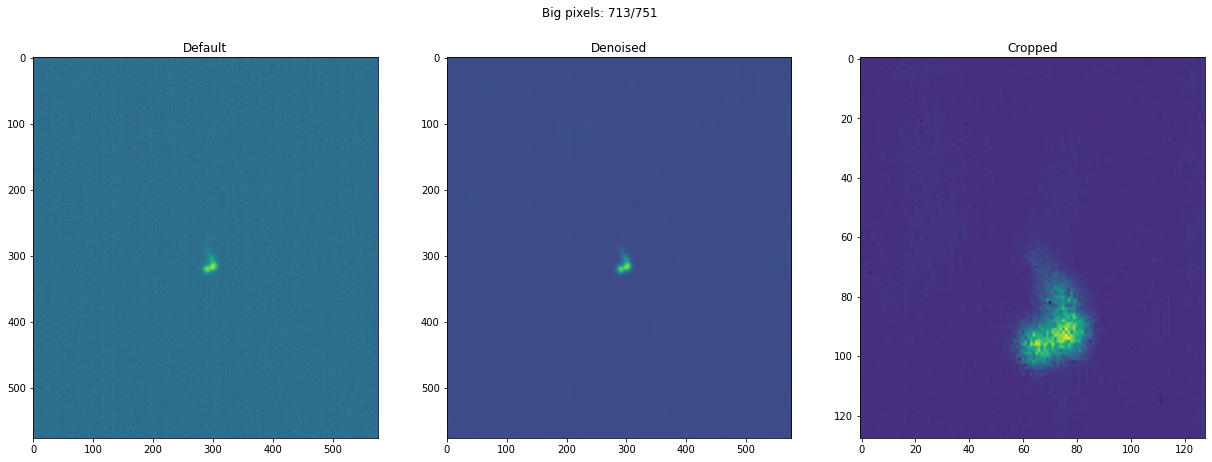

In [149]:
for er_im in er:
    crop_denoise(er_im, draw=True)

In [88]:
np.sum(ER6_den[np.where(ER6_den<98 & ER6_den>102)])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [80]:
ER6_den.shape[0]*ER6_den.shape[1]

331776

In [92]:
ER6_den.shape[0]/2

288.0